Epoch 1/100
3/3 - 0s - loss: 0.7661 - accuracy: 0.3626 - val_loss: 0.7372 - val_accuracy: 0.4699 - 451ms/epoch - 150ms/step
Epoch 2/100
3/3 - 0s - loss: 0.7119 - accuracy: 0.5165 - val_loss: 0.6915 - val_accuracy: 0.5792 - 20ms/epoch - 7ms/step
Epoch 3/100
3/3 - 0s - loss: 0.6705 - accuracy: 0.6044 - val_loss: 0.6545 - val_accuracy: 0.6557 - 19ms/epoch - 6ms/step
Epoch 4/100
3/3 - 0s - loss: 0.6298 - accuracy: 0.7253 - val_loss: 0.6249 - val_accuracy: 0.6995 - 21ms/epoch - 7ms/step
Epoch 5/100
3/3 - 0s - loss: 0.5967 - accuracy: 0.7912 - val_loss: 0.6001 - val_accuracy: 0.7322 - 19ms/epoch - 6ms/step
Epoch 6/100
3/3 - 0s - loss: 0.5720 - accuracy: 0.7802 - val_loss: 0.5788 - val_accuracy: 0.7568 - 21ms/epoch - 7ms/step
Epoch 7/100
3/3 - 0s - loss: 0.5471 - accuracy: 0.7912 - val_loss: 0.5603 - val_accuracy: 0.7678 - 19ms/epoch - 6ms/step
Epoch 8/100
3/3 - 0s - loss: 0.5257 - accuracy: 0.7912 - val_loss: 0.5437 - val_accuracy: 0.7760 - 22ms/epoch - 7ms/step
Epoch 9/100
3/3 - 0s - loss: 

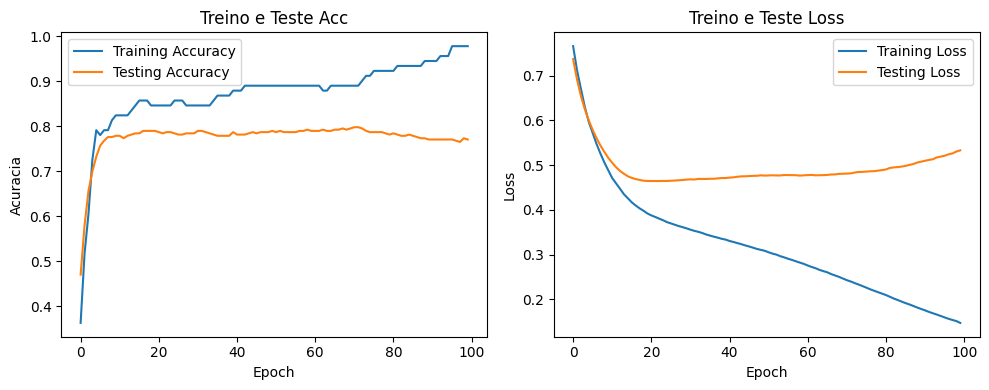

12/12 [==============================] - 0s 691us/step - loss: 0.5331 - accuracy: 0.7705
Loss: 0.5331, Accuracy: 77.05%
12/12 [==============================] - 0s 592us/step


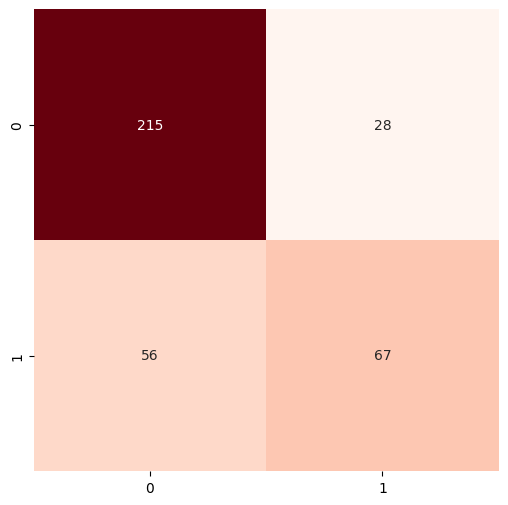

12/12 [==============================] - 0s 561us/step


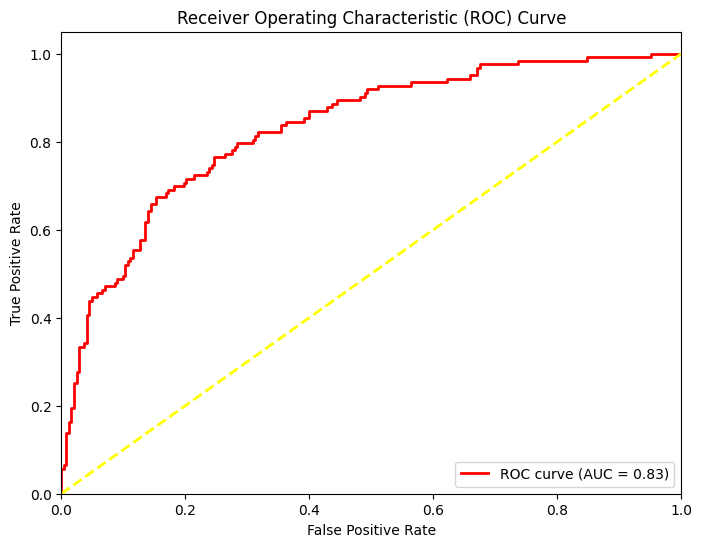

In [74]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc

data = pd.read_csv('diabetes.csv')

# Pre processamento

feature_cols = ['Pregnancies', 'Glucose',  'SkinThickness', 'BMI', 'DiabetesPedigreeFunction','Age']
f2 = ['Pregnancies', 'Glucose',  'SkinThickness', 'BMI', 'DiabetesPedigreeFunction','Age','Outcome']
X = data[f2]
X = X[(X[feature_cols] != 0).all(axis=1)]
y = X.Outcome
X = X.drop(columns=['Outcome'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Modelo 
keras_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(8, activation='tanh'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

keras_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = keras_model.fit(X_train, y_train,epochs=100, verbose=2, validation_data=(X_test, y_test))

# Acuracia 

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Acuracia')
plt.title('Treino e Teste Acc')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Treino e Teste Loss')
plt.legend()

plt.tight_layout()
plt.show()

loss, accuracy = keras_model.evaluate(X_test, y_test)
print(f'Loss: {loss:.4f}, Accuracy: {accuracy * 100:.2f}%')

# Matriz
y_pred = (keras_model.predict(X_test) > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False, 
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.show()


# ROC
y_prob = keras_model.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='yellow', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()